In [482]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [483]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
r=0.1
# Discount rate=10%
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
underground_line={'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#overhead_line={'over_or_under':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#underground_line={'over_or_under':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# over_or_under= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line
###

In [484]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [485]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


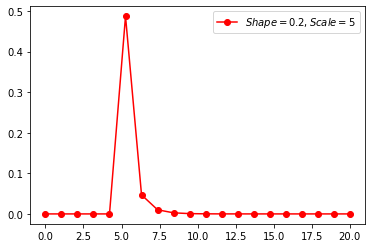

In [486]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [487]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [488]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


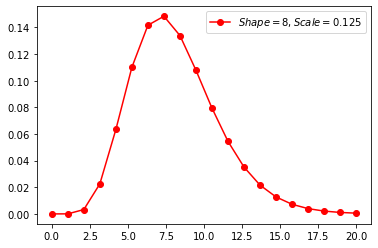

In [489]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

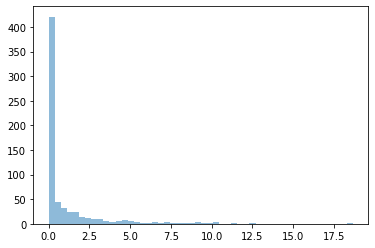

[7.42133658e-02 8.22562546e-02 9.15703495e+00 1.32497431e-01
 5.70135054e-02 4.21589098e-01 4.20822647e+00 4.75088618e-04
 3.31219711e-02 5.75114807e-03 2.66448464e-09 3.21625891e-06
 1.50363652e-07 2.54599920e-03 5.75643250e-02 1.50134295e-01
 7.24057318e-03 4.45648373e-02 1.26429787e-04 4.51565067e+00
 1.35118862e+00 9.41621309e-01 3.81415637e-04 6.03608740e-05
 2.26314563e-02 3.08411324e-05 7.09261670e-02 4.01898477e-04
 2.08231730e-01 1.98182206e-03 4.14822850e+00 4.74998894e-04
 2.24496267e+00 1.17660665e-01 8.73684692e-01 3.97570195e-01
 8.23279128e-01 1.87507282e-01 1.94714652e+00 3.63535283e-04
 2.87164076e-02 2.10808304e-07 4.41754417e-03 1.29968919e+00
 5.33957257e-02 1.50211888e-03 9.75540739e-04 2.15514718e-03
 9.90971087e-01 1.08653783e-05 3.57121862e-01 2.56084658e+00
 6.39127408e-03 3.91939870e-02 1.79678262e-14 5.49445831e-04
 1.81628565e-07 5.65371831e-01 5.68520571e-02 1.04878160e-02
 1.83167359e-01 1.49388797e-06 1.61472408e-07 4.21318099e+00
 2.28214776e-01 8.139482

In [490]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year

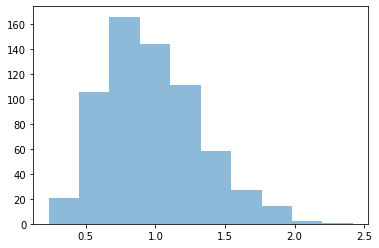

In [491]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
#print (lengths)
#Randomly determined circuit's ages in the base year
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [492]:
#class Circuit:
    #def __init__(self, length, age, x):
        #self.length=length
        #self.age=age
        #self.x=x
    
#circuit_1=Circuit(25,20,0)
#circuit_2=Circuit(24,21,1)
#circuit_3=Circuit(22,22,1)
#circuit_4=Circuit(18,18,0)
#circuit_5=Circuit(25,30,1)
#circuit_6=Circuit(36,19,0)
#circuit_7=Circuit(31,29,0)
#circuit_8=Circuit(29,27,1)
#circuit_9=Circuit(25,24,0)
#circuit_10=Circuit(27,26,0)

In [493]:
random.uniform(0,1)

0.5224075092365787

In [494]:
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        #self.over_or_under = self.underground
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_random_age_baseyear(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year
    def get_random_length_baseyear(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year
###Three above methods are defined to identify lengh, age and overhead or underground, which are three atributes of a circuit.
    #def lifespan_over_or_under(self):
        #if self.over_or_under()==0:
            #lifespan_x= overhead_line['lifespan']
        #elif self.over_or_under()==1:
            #lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        #return (lifespan_x)
    #def replcost_x_over_or_under(self):
        #if self.over_or_under==0:
            #lifespan_x= overhead_line['lifespan']
        #if self.over_or_under==1:
            #lifespan_x= underground_line['lifespan']
        #print (lifespan_x)
###Above methods are for defining different parameters in the model subject to x=0(overhead) or x=1(underground)
    
    # def set_lifespan(): # SET lifespan separately
    def get_age_array(self):
        over_or_under= circuit_i.get_underground()[0]
        if over_or_under==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif over_or_under==1:
            lifespan_x= int(underground_line['lifespan'])
        #else:
            #lifespan_x=0
        age_i_baseyear= self.age[0] #self.get_random_age_baseyear()
        age_i_t=0
        age_i_t_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if age_i_baseyear<=lifespan_x:
                age_i_t= (age_i_baseyear)+(t-baseyear)
                age_i_t_array.append(age_i_t)
            elif age_i_baseyear-lifespan_x==1:
                age_i_t=1
                age_i_t_array.append(age_i_t)
            elif age_i_baseyear-lifespan_x>1:
                age_i_t=(age_i_t)+1
                age_i_t_array.append(age_i_t)
        return(age_i_t_array)
    def get_current_age(self,t):
        ages_list=self.get_age_array()
        current_age=ages_list[t-baseyear]
        return(current_age)
    # Determining list of circuit's ages based on different ts
    def get_replcost_x_t(self):
        #over_or_under= self.get_underground()
        over_or_under= self.get_underground()[0]
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        #else:
            #lifespan_x=0
            #replecost_x=0
            #replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if t==baseyear:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-baseyear)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
        return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def get_capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_StatusQuo_i=0
        capex_StatusQuo_list=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((rplcost_x_t)(age_i_t))/((1+r)**(t-baseyear))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
                capex_StatusQuo_list.append(capex_StatusQuo_i)
            else:
                capex_StatusQuo_i=0
                capex_StatusQuo_list.append(capex_StatusQuo_i)
        return (max(capex_StatusQuo_list))
    #Determining list of Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def get_opex_x_t(self):
        over_or_under= self.get_underground()[0]
        age_i=self.get_age_array()
        replcost_x=self.get_replcost_x_t()
        if over_or_under==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif over_or_under==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        opex_x_t_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=0
            age_i_t=age_i[t-baseyear]
            replcost_x_t=replcost_x[t-baseyear]
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            elif age_i_t>1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            else:
                None
        return (opex_x_t_array)
    #Annual operation and maintenance expenses for each line
    def get_opex_StatusQuo_i(self):
        opex_x=self.get_opex_x_t()
        length_i=self.get_random_length_baseyear()
        opex_StatusQuo_i=0
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=opex_x[t-baseyear]
            opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def get_lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        for i in range (number_circuit):
            capex_StatusQuo_i=self.get_capex_StatusQuo_i()
            opex_StatusQuo_i=self.get_opex_StatusQuo_i()
            lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
            lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def get_first_retire_i(self):
        age_baseyear=self.get_random_age_baseyear()
        age_baseyear_i=age_baseyear[0]
        #over_or_under= self.get_underground()
        if self.underground==0:
            lifespan_x=overhead_line['lifespan']
        elif self.underground==1:
            lifespan_x= underground_line['lifespan']
        else:
            lifespan_x=0
        first_retire_i=(lifespan_x)-(age_baseyear_i)+baseyear
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def get_capex_underground_i(self):
        over_or_under= circuit_i.get_underground()[0]
        if over_or_under==0:
            self.underground=1
        length_i=self.get_random_length_baseyear()
        capex_underground_i=0
        rplcost_x_t=self.get_replcost_x_t()
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            capex_i=((rplcost_x_t)*(length_i))/((1+r)**(t-baseyear))
            capex_underground_i=(capex_underground_i)+(capex_i)
        return (capex_StatusQuo_i)
    #Undergrounding capital expenses
    def get_opex_underground_i (self):
        #over_or_under= self.get_underground()
        opex_x=self.get_opex_x_t()
        length_i=self.get_random_length_baseyear()
        first_retire_i=self.get_first_retire_i()
        opex_underground_i=0
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=opex_x[t-baseyear]
            if  self.underground==1:
                opex_i=((opex_x_t)(length_i))/((1+r)^(t-baseyear))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    self.underground==1
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def get_lifecyclecost_underground(self):
        lifecyclecost_underground=0
        for i in range (number_circuit):
            capex_underground_i=self.get_capex_underground_i()
            opex_underground_i=self.get_opex_underground_i()
            lifecyclecost_i= capex_underground_i+opex_underground_i
            lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.get_first_retire_i()
        length_i=self.get_random_length_baseyear()
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if t>= first_retire_i:
                sumlength=0
                for i in range (number_circuit):
                    sumlength=sumlength+length_i
                    return (sumlength)
                underground_t=underground_baseyear+sumlength
            else:
                underground_t=underground_baseyear
        return(underground_t)
    #Determining future annual underground line mileage
    def lifecycle_net(self):
        lifecyclecost_underground=self.get_lifecyclecost_underground()
        lifecyclecost_StatusQuo=self.get_lifecyclecost_StatusQuo()
        lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #Determining the additional lifecycle costs due to undergrounding                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_random_length_baseyear()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [495]:
circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
circuit_over_or_under=circuit_i.get_underground()
print(circuit_over_or_under)
circuit_random_age_baseyear=circuit_i.get_random_age_baseyear
print(circuit_random_age_baseyear)
circuit_random_length_baseyear=circuit_i.get_random_length_baseyear
print(circuit_random_length_baseyear)
circuit_age_baseyear=circuit_i.get_random_age_baseyear()
print (circuit_age_baseyear)
#circuit_age_i_t_list=[]  
age_i_list=circuit_i.get_age_array()
print(age_i_list)
#Circuit i ages list in different ts 
age_i_t=circuit_i.get_current_age(2030)
print(age_i_t)
#circuit i age in current year t (which should be entered to the method as an input)
#print('x=',circuit_over_or_under,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

[0]
<bound method Circuit.get_random_age_baseyear of <__main__.Circuit object at 0x000001E4BA8B78E0>>
<bound method Circuit.get_random_length_baseyear of <__main__.Circuit object at 0x000001E4BA8B78E0>>
[0.7110797548782841]
[0.7110797548782841, 1.7110797548782841, 2.711079754878284, 3.711079754878284, 4.711079754878284, 5.711079754878284, 6.711079754878284, 7.711079754878284, 8.711079754878284, 9.711079754878284, 10.711079754878284, 11.711079754878284, 12.711079754878284, 13.711079754878284, 14.711079754878284, 15.711079754878284, 16.711079754878284, 17.711079754878284, 18.711079754878284, 19.711079754878284, 20.711079754878284, 21.711079754878284, 22.711079754878284, 23.711079754878284, 24.711079754878284, 25.711079754878284, 26.711079754878284, 27.711079754878284, 28.711079754878284, 29.711079754878284, 30.711079754878284, 31.711079754878284, 32.711079754878284, 33.711079754878284, 34.711079754878284, 35.711079754878284, 36.711079754878284, 37.711079754878284, 38.711079754878284, 39.

In [496]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    circuit_over_or_under=circuit_i.get_underground()
    #print(circuit_over_or_under)
    circuit_age_baseyear=circuit_i.get_random_age_baseyear()
    #print (circuit_age_baseyear)     
    circuit_age_i_t_list=circuit_i.get_age_array()
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_over_or_under,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

x= [1] & Segment age in baseyear= [0.9098394305377905] & Segment age in t= [0.9098394305377905, 1.9098394305377906, 2.9098394305377906, 3.9098394305377906, 4.90983943053779, 5.90983943053779, 6.90983943053779, 7.90983943053779, 8.90983943053779, 9.90983943053779, 10.90983943053779, 11.90983943053779, 12.90983943053779, 13.90983943053779, 14.90983943053779, 15.90983943053779, 16.90983943053779, 17.90983943053779, 18.90983943053779, 19.90983943053779, 20.90983943053779, 21.90983943053779, 22.90983943053779, 23.90983943053779, 24.90983943053779, 25.90983943053779, 26.90983943053779, 27.90983943053779, 28.90983943053779, 29.90983943053779, 30.90983943053779, 31.90983943053779, 32.909839430537794, 33.909839430537794, 34.909839430537794, 35.909839430537794, 36.909839430537794, 37.909839430537794, 38.909839430537794, 39.909839430537794, 40.909839430537794, 41.909839430537794, 42.909839430537794, 43.909839430537794, 44.909839430537794]
x= [1] & Segment age in baseyear= [0.6781119786136852] & S

x= [1] & Segment age in baseyear= [0.14721169300925158] & Segment age in t= [0.14721169300925158, 1.1472116930092515, 2.1472116930092517, 3.1472116930092517, 4.147211693009251, 5.147211693009251, 6.147211693009251, 7.147211693009251, 8.147211693009252, 9.147211693009252, 10.147211693009252, 11.147211693009252, 12.147211693009252, 13.147211693009252, 14.147211693009252, 15.147211693009252, 16.14721169300925, 17.14721169300925, 18.14721169300925, 19.14721169300925, 20.14721169300925, 21.14721169300925, 22.14721169300925, 23.14721169300925, 24.14721169300925, 25.14721169300925, 26.14721169300925, 27.14721169300925, 28.14721169300925, 29.14721169300925, 30.14721169300925, 31.14721169300925, 32.147211693009254, 33.147211693009254, 34.147211693009254, 35.147211693009254, 36.147211693009254, 37.147211693009254, 38.147211693009254, 39.147211693009254, 40.147211693009254, 41.147211693009254, 42.147211693009254, 43.147211693009254, 44.147211693009254]
x= [0] & Segment age in baseyear= [4.5377706

x= [0] & Segment age in baseyear= [12.05143989914636] & Segment age in t= [12.05143989914636, 13.05143989914636, 14.05143989914636, 15.05143989914636, 16.05143989914636, 17.05143989914636, 18.05143989914636, 19.05143989914636, 20.05143989914636, 21.05143989914636, 22.05143989914636, 23.05143989914636, 24.05143989914636, 25.05143989914636, 26.05143989914636, 27.05143989914636, 28.05143989914636, 29.05143989914636, 30.05143989914636, 31.05143989914636, 32.05143989914636, 33.05143989914636, 34.05143989914636, 35.05143989914636, 36.05143989914636, 37.05143989914636, 38.05143989914636, 39.05143989914636, 40.05143989914636, 41.05143989914636, 42.05143989914636, 43.05143989914636, 44.05143989914636, 45.05143989914636, 46.05143989914636, 47.05143989914636, 48.05143989914636, 49.05143989914636, 50.05143989914636, 51.05143989914636, 52.05143989914636, 53.05143989914636, 54.05143989914636, 55.05143989914636, 56.05143989914636]
x= [0] & Segment age in baseyear= [0.3336657604296614] & Segment age i

In [497]:
circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
replcost_x_t_i=circuit_i.get_replcost_x_t()
print(replcost_x_t_i)
capex_StatusQuo_i=circuit_i.get_capex_StatusQuo_i()
print(capex_StatusQuo_i)
opex_x_t=circuit_i.get_opex_x_t()
print(opex_x_t)
opex_StatusQuo_i=circuit_i.get_opex_StatusQuo_i()
print(opex_StatusQuo_i)
lifecyclecost_StatusQuo=circuit_i.get_lifecyclecost_StatusQuo()
print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

[357000, 364140.0, 371280.0, 378420.0, 385560.0, 392700.0, 399840.0, 406980.0, 414120.0, 421260.0, 428400.0, 435540.0, 442680.0, 449820.0, 456960.0, 464100.0, 471240.0, 478380.0, 485520.0, 492660.0, 499800.0, 506940.0, 514080.0, 521220.0, 528360.0, 535500.0, 542640.0, 549780.0, 556920.0, 564060.0, 571200.0, 578340.0, 585480.0, 592620.0, 599760.0, 606900.0, 614040.0, 621180.0, 628320.0, 635460.0, 642600.0, 649740.0, 656880.0, 664020.0, 671160.0]
0
[3641.4, 3712.8, 3784.2000000000003, 3855.6, 3927.0, 3998.4, 4069.8, 4141.2, 4212.6, 4284.0, 4355.4, 4426.8, 4498.2, 4569.6, 4641.0, 4712.400000000001, 4783.8, 4855.2, 4926.6, 4998.0, 5069.400000000001, 5140.8, 5212.2, 5283.6, 5355.0, 5426.400000000001, 5497.8, 5569.2, 5640.6, 5712.0, 5783.400000000001, 5854.8, 5926.2, 5997.6, 6069.0, 6140.400000000001, 6211.8, 6283.2, 6354.6, 6426.0, 6497.400000000001, 6568.8, 6640.2, 6711.6]


IndexError: list index out of range

In [498]:
circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
first_retire_i=circuit_i.get_first_retire_i()
print(first_retire_i)
capex_underground_i=circuit_i.get_capex_underground_i()
print(capex_underground_i)
opex_underground_i=circuit_i.get_opex_underground_i()
print(opex_underground_i)
lifecyclecost_underground=circuit_i.get_lifecyclecost_underground()
print(ifecyclecost_underground)
underground_t=circuit_i.underground_t()
print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, ifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

2020.9999212255675


TypeError: 'int' object is not subscriptable